In [1]:
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from utilities import split_dataframe, generate_xy_splits, nan_null_empty_check
from prepare import generate_scaled_splits
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

## 1.Select a dataset with a continuous target variable.

In [2]:
swiss_df = data("swiss")

## 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [3]:
swiss_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [4]:
nan_null_empty_check(swiss_df)

NaN values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------
Empty values
Empty DataFrame
Columns: [rows, columns]
Index: []
--------------------------------


{'nan_positions': (array([], dtype=int64), array([], dtype=int64)),
 'empty_positions': (array([], dtype=int64), array([], dtype=int64))}

In [5]:
swiss_df.rename(columns={'Infant.Mortality' : 'Infant_Mortality'}, inplace=True)
swiss_df.sample(14)

,Fertility,Agriculture,Examination,Education,Catholic,Infant_Mortality
Rolle,60.5,60.8,16,10,7.72,16.3
Grandson,71.7,34.0,17,8,3.30,20.0
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0
Sierre,92.2,84.6,3,3,99.46,16.3
Nyone,56.6,50.9,22,12,15.14,16.7
Gruyere,82.4,53.3,12,7,97.67,21.0
Le Locle,72.7,16.7,22,13,11.22,18.9
Boudry,70.4,38.4,26,12,5.62,20.3
Lausanne,55.7,19.4,26,28,12.11,20.2
Entremont,69.3,84.9,7,6,99.68,19.8


In [6]:
train, validate, test = split_dataframe(swiss_df)

## 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [7]:
splits = generate_xy_splits(train, validate, test, 'Fertility')

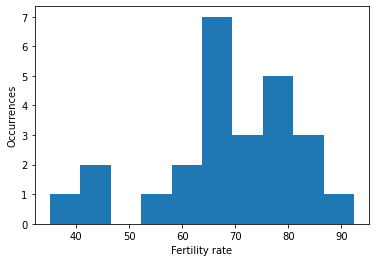

In [8]:
plt.hist(splits['y_train'])
plt.xlabel("Fertility rate")
plt.ylabel("Occurrences")
plt.show()

In [9]:
# Establish baseline
mean_fertility = splits['y_train'].mean()
median_fertility = splits['y_train'].median()
(mean_fertility, median_fertility)

(67.744, 68.3)

In [10]:
y_train = pd.DataFrame(splits['y_train'])
y_train['mean_'] = mean_fertility

y_validate = pd.DataFrame(splits['y_validate'])
y_validate['mean_'] = mean_fertility

In [11]:
y_train['median_'] = median_fertility
y_validate['median_'] = median_fertility

In [12]:
rmse_train = mean_squared_error(y_train.Fertility, y_train.mean_) ** 1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.mean_) ** 1/2

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  86.43 
Validate/Out-of-Sample:  81.9


In [13]:
rmse_train = mean_squared_error(y_train.Fertility, y_train.median_) ** 1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.median_) ** 1/2

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  86.59 
Validate/Out-of-Sample:  78.24


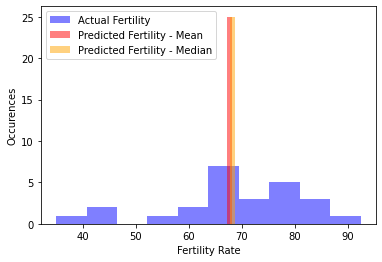

In [14]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.Fertility, color='blue', alpha=.5, label="Actual Fertility")
plt.hist(y_train.mean_, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Fertility - Mean")
plt.hist(y_train.median_, bins=1, color='orange', alpha=.5, rwidth=100, label="Predicted Fertility - Median")
plt.xlabel("Fertility Rate")
plt.ylabel("Occurences")
plt.legend()
plt.show()

In [16]:
# OLS
lm = LinearRegression(normalize=True)

lm.fit(splits['X_train'], y_train.Fertility)

y_train['pred_fertility_lm'] = lm.predict(splits['X_train'])
y_validate['pred_fertility_lm'] = lm.predict(splits['X_validate'])

In [18]:
rmse_train = mean_squared_error(y_train.Fertility, y_train.pred_fertility_lm) ** 1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.pred_fertility_lm) ** 1.2

print("RMSE using OLS\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using OLS
Train/In-Sample:  23.94 
Validate/Out-of-Sample:  174.08


In [19]:
# LassoLars
lars = LassoLars(alpha=1.0)

lars.fit(splits['X_train'], y_train.Fertility)

LassoLars()

In [20]:
y_train['pred_fertility_lars'] = lars.predict(splits['X_train'])
y_validate['pred_fertility_lars'] = lars.predict(splits['X_validate'])

In [21]:
rmse_train = mean_squared_error(y_train.Fertility, y_train.pred_fertility_lars) ** 1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.pred_fertility_lars) ** 1/2

print("RMSE using LARS\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using LARS
Train/In-Sample:  50.64 
Validate/Out-of-Sample:  65.98


In [22]:
# GLM
glm = TweedieRegressor(power=1, alpha=0)

glm.fit(splits['X_train'], y_train.Fertility)

TweedieRegressor(alpha=0, power=1)

In [23]:
y_train['pred_fertility_glm'] = glm.predict(splits['X_train'])
y_validate['pred_fertility_glm'] = glm.predict(splits['X_validate'])

In [25]:
rmse_train = mean_squared_error(y_train.Fertility, y_train.pred_fertility_glm) ** 1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.pred_fertility_glm) ** 1/2

print("RMSE using GLM\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using GLM
Train/In-Sample:  25.09 
Validate/Out-of-Sample:  37.3


In [26]:
# polynomial regression
pf = PolynomialFeatures(degree=2)

X_train_degree2 = pf.fit_transform(splits['X_train'])

X_validate_degree2 = pf.transform(splits['X_validate'])
X_test_degree2 = pf.transform(splits['X_test'])

lm2 = LinearRegression(normalize=2)

lm2.fit(X_train_degree2, y_train.Fertility)

In [28]:
y_train['pred_fertility_poly'] = lm2.predict(X_train_degree2)
y_validate['pred_fertility_poly'] = lm2.predict(X_validate_degree2)

In [31]:
rmse_train = mean_squared_error(y_train.Fertility, y_train.pred_fertility_poly) ** 1/2
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.pred_fertility_poly) ** 1/2

print("RMSE using polynomial regression\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using polynomial regression
Train/In-Sample:  3.95 
Validate/Out-of-Sample:  94.53


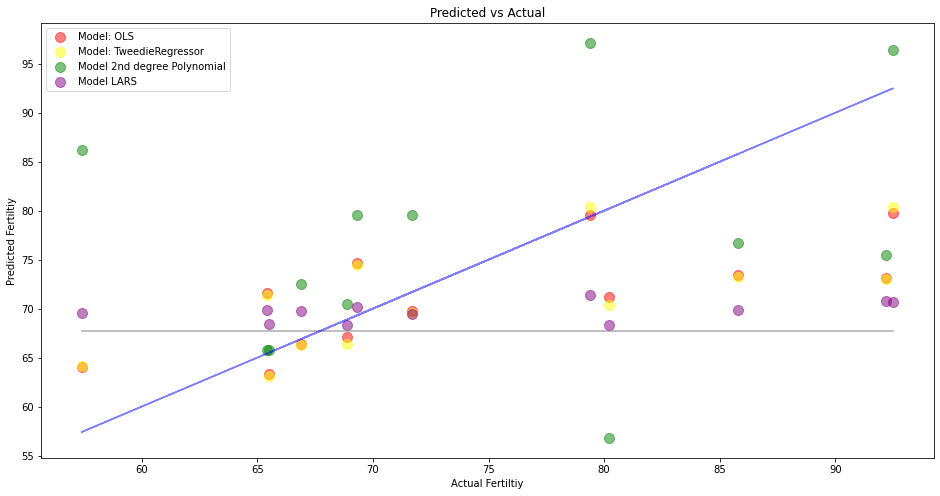

In [38]:
# plot actual vs predicted
plt.figure(figsize=(16,8))
plt.plot(y_validate.Fertility, y_validate.mean_, alpha=.5, color="gray", label='_nolegend_')
plt.plot(y_validate.Fertility, y_validate.Fertility, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.Fertility, y_validate.pred_fertility_lm, 
            alpha=.5, color="red", s=100, label="Model: OLS")
plt.scatter(y_validate.Fertility, y_validate.pred_fertility_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.pred_fertility_poly, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.Fertility, y_validate.pred_fertility_lars, 
            alpha=.5, color="purple", s=100, label="Model LARS")
plt.legend()
plt.xlabel("Actual Fertiltiy")
plt.ylabel("Predicted Fertiltiy")
plt.title("Predicted vs Actual")
plt.show()

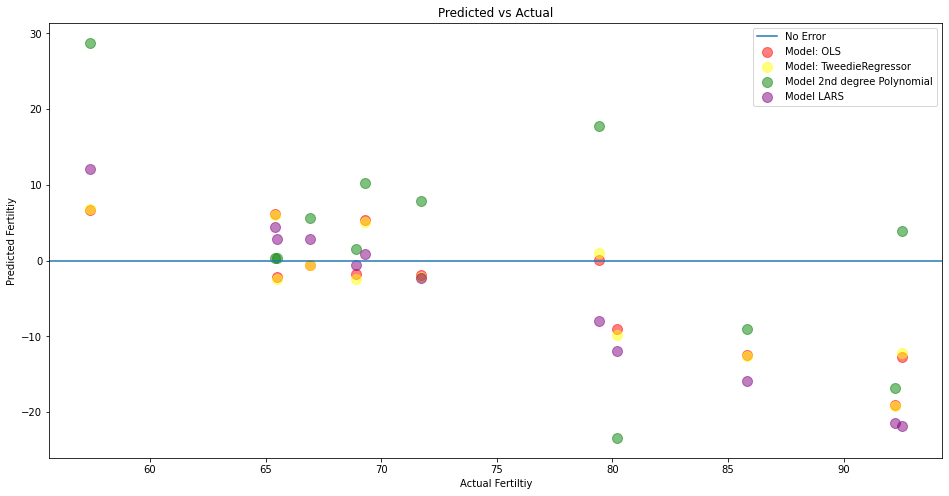

In [40]:
# plot residuals
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.Fertility, y_validate.pred_fertility_lm-y_validate.Fertility, 
            alpha=.5, color="red", s=100, label="Model: OLS")
plt.scatter(y_validate.Fertility, y_validate.pred_fertility_glm-y_validate.Fertility, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.pred_fertility_poly-y_validate.Fertility, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.scatter(y_validate.Fertility, y_validate.pred_fertility_lars-y_validate.Fertility, 
            alpha=.5, color="purple", s=100, label="Model LARS")
plt.legend()
plt.xlabel("Actual Fertiltiy")
plt.ylabel("Predicted Fertiltiy")
plt.title("Predicted vs Actual")
plt.show()

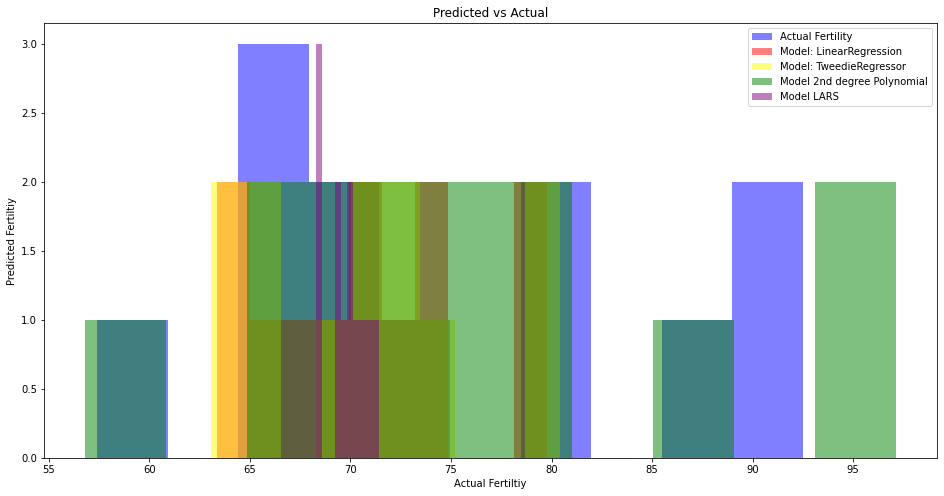

In [41]:
# histogram
plt.figure(figsize=(16,8))
plt.hist(y_validate.Fertility, color='blue', alpha=.5, label="Actual Fertility")
plt.hist(y_validate.pred_fertility_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.pred_fertility_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.pred_fertility_poly, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.hist(y_validate.pred_fertility_lars, color='purple', alpha=.5, label="Model LARS")
plt.xlabel("Actual Fertiltiy")
plt.ylabel("Predicted Fertiltiy")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

In [44]:
# Select GLM as best model
y_test = pd.DataFrame(splits['y_test'])

y_test['pred_fertility_glm'] = glm.predict(splits['X_test'])

rmse_test = mean_squared_error(y_test.Fertility, y_test.pred_fertility_glm) ** 1/2

print("RMSE for GLM Model\nOut-of-Sample Performance: ", rmse_test)

RMSE for GLM Model
Out-of-Sample Performance:  15.540304875813467
